In [1]:
import pandas as pd

colunas = ['PROCESSO', 'ROTULO_MANUAL', 'LEI']

df = pd.read_csv('../data/leis.csv', header=0, sep=',', quotechar='"', usecols=colunas)

In [2]:
 df.head()

,PROCESSO,ROTULO_MANUAL,LEI
0,00039604720138240039,CDC,artigo 535
1,00039604720138240039,CDC,9656/1998
2,00039604720138240039,CDC,616/2012
3,00039604720138240039,CDC,artigo 535
4,00039604720138240039,CDC,9656/1998


Utitiza apenas label que contenham mais de 200 exemplos.

In [3]:
rotulos = ['EXP', 'BAN', 'OIG', 'DAN', 'SEG', 'CON', 'OIE']

df.loc[~df['ROTULO_MANUAL'].isin(rotulos), 'ROTULO_MANUAL'] = 'NONE'

In [4]:
groupby_rotulo = df.groupby('ROTULO_MANUAL')

groupby_rotulo[['LEI']].count().sort_values(['LEI'], ascending=False)

,LEI
ROTULO_MANUAL,
EXP,28742
NONE,18962
BAN,7063
OIG,6577
DAN,5067
CON,3977
OIE,3112
SEG,2969


In [5]:
df.shape

(76469, 3)

In [6]:
data = df.groupby(['PROCESSO', 'ROTULO_MANUAL', 'LEI']).size().unstack('LEI', fill_value=0)
data = data.reset_index()

data.head()

LEI,PROCESSO,ROTULO_MANUAL,1/1975,1/2012,1/2014,100/2015,101/2010,10144/2002,10150/2000,1025/2009,...,artigo 975,artigo 977,artigo 98,artigo 982,artigo 988,artigo 99,artigo 991,artigo 995,artigo 996,artigo 998
0,00000012120028240050,CON,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000032720118240033,CON,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00000042220138240104,BAN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00000042920148240058,CON,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00000057320168240242,NONE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y = data['ROTULO_MANUAL'].values
y.shape

(6390,)

In [8]:
df1 = data.iloc[:,2:].copy()
df1.head()

LEI,1/1975,1/2012,1/2014,100/2015,101/2010,10144/2002,10150/2000,1025/2009,10257/2001,10391/2004,...,artigo 975,artigo 977,artigo 98,artigo 982,artigo 988,artigo 99,artigo 991,artigo 995,artigo 996,artigo 998
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x = df1.values
x.shape

(6390, 946)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

import collections

print(collections.Counter(y_train))
print(collections.Counter(y_test))

Counter({'NONE': 1632, 'EXP': 557, 'BAN': 555, 'OIG': 549, 'OIE': 425, 'DAN': 392, 'CON': 352, 'SEG': 330})
Counter({'NONE': 553, 'EXP': 203, 'BAN': 167, 'OIG': 162, 'OIE': 149, 'CON': 128, 'DAN': 125, 'SEG': 111})


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

text_clf = Pipeline([
    ('clf', clf)
])

text_clf.fit(x , y)

Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Testando o modelo.

In [12]:
y_pred = text_clf.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8485607008760951

In [13]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         BAN       0.90      0.80      0.85       167
         CON       0.85      0.73      0.79       128
         DAN       0.90      0.80      0.85       125
         EXP       0.92      0.88      0.90       203
        NONE       0.78      0.93      0.85       553
         OIE       0.76      0.78      0.77       149
         OIG       0.97      0.85      0.90       162
         SEG       0.99      0.76      0.86       111

   micro avg       0.85      0.85      0.85      1598
   macro avg       0.88      0.82      0.85      1598
weighted avg       0.86      0.85      0.85      1598



In [14]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)

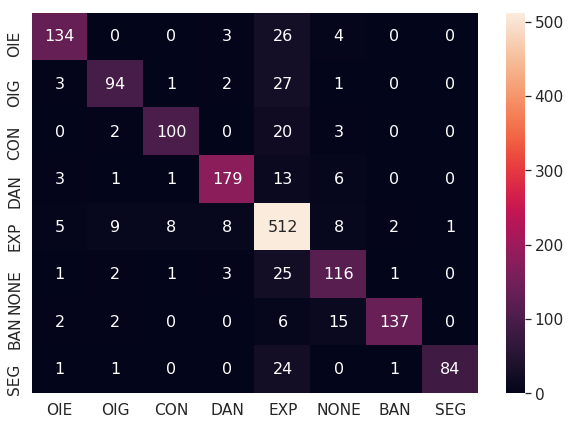

In [16]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

labels = set(y_test)
      
df_cm = pd.DataFrame(cnf_matrix, range(len(labels)), range(len(labels)))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, xticklabels=labels, yticklabels=labels, annot=True, fmt='g', annot_kws={"size": 16})

In [17]:
features = list(data.columns.values)
del features[0:2]

len(features)

946

In [18]:
df_sample = pd.DataFrame(columns=features)
df_sample = df_sample.append({'artigo 1018': 1}, ignore_index=True)
df_sample = df_sample.fillna(0)

df_sample

,1/1975,1/2012,1/2014,100/2015,101/2010,10144/2002,10150/2000,1025/2009,10257/2001,10391/2004,...,artigo 975,artigo 977,artigo 98,artigo 982,artigo 988,artigo 99,artigo 991,artigo 995,artigo 996,artigo 998
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y_pred = text_clf.predict(df_sample)

y_pred

array(['EXP'], dtype=object)

In [20]:
from sklearn.externals import joblib

joblib.dump(features, '../modelos/Features-Leis.pkl', compress = 1)
joblib.dump(clf, '../modelos/Modelo-Leis.pkl', compress = 1) 

['../modelos/Modelo-Leis.pkl']